### Task-2 
#### TITANIC SURVIVAL PREDICTION
##### SAMEEKSHA VERMA


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data=pd.read_csv('/Users/ali/Downloads/tested.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
#firstly lets describe our data 
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


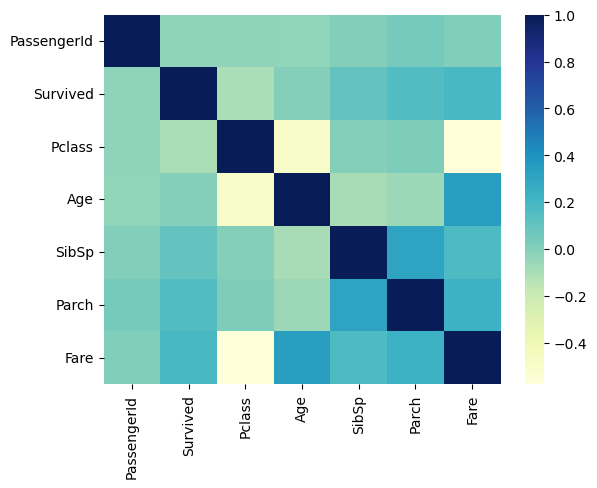

In [4]:
#will check how these data are related and a heat map will show the correlation between certain features 
sns.heatmap(data.corr(),cmap='YlGnBu')
plt.show()

In [5]:
#lets check for any missing values in the dataset 
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#will check the Percentage of our null values
null_perc=data.isnull().sum()*100/len(data)
null_perc

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

<AxesSubplot:>

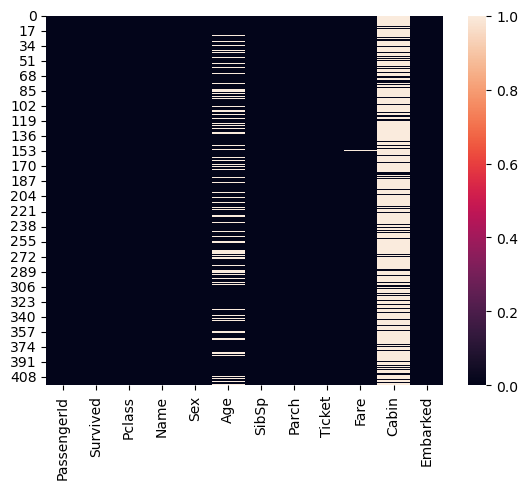

In [7]:
#by Visualising  our data into a heat map format to Clearly see where all the missing values are located
sns.heatmap(data.isnull())

### Find out how many people survived VS died using countplt

<AxesSubplot:xlabel='Survived', ylabel='count'>

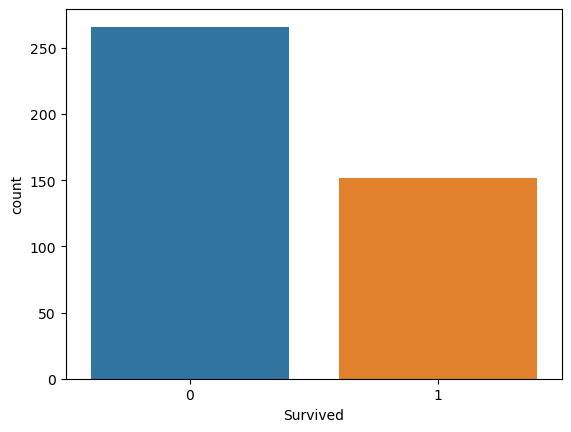

In [8]:
sns.countplot(x='Survived',data=data)

##### Distribution of age groups

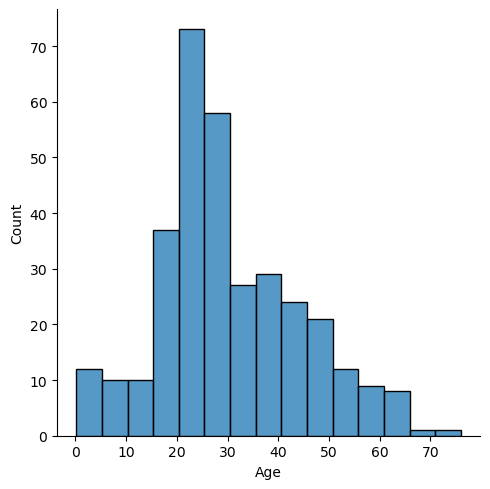

In [9]:
sns.displot(x='Age',data=data)

## Data Cleaning

In [10]:
#lets fill the missing values in Age group we found earlier with the mean of our age
data['Age'].mean()
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [11]:
#to verify will see if there is any null data in Age column
data['Age'].isna().sum()

0

In [12]:
#NOW we have so many null values in cabin column hence its not needed for our analysis we will drop it 
data.drop('Cabin',axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


## Modeling

In [13]:
#to feed the data into ou model we need to convert all non-numerical columns to a numeric 
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [14]:
#these are the columns which we need to convert Embarked,Ticket,Sex and Name . will convert only SEX and drop 
#the rest as its not useful for the model
gender=pd.get_dummies(data['Sex'],drop_first=True)
gender

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [15]:
data['Gender']=gender

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [17]:
#drop the unwanted columns
data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,0,3,34.5,0,0,7.8292,1
1,893,1,3,47.0,1,0,7.0000,0
2,894,0,2,62.0,0,0,9.6875,1
3,895,0,3,27.0,0,0,8.6625,1
4,896,1,3,22.0,1,1,12.2875,0


In [18]:
# Separate our data into X-Independent and Y-dependent 
x=data[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=data['Survived']



In [19]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,3,34.5,0,0,7.8292,1
1,893,3,47.0,1,0,7.0000,0
2,894,2,62.0,0,0,9.6875,1
3,895,3,27.0,0,0,8.6625,1
4,896,3,22.0,1,1,12.2875,0


In [20]:
y.head

<bound method NDFrame.head of 0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64>

#### Build the model using logistic regression 

In [21]:
#will split our data into train and test set by importing train test split method
from sklearn.model_selection import train_test_split

In [36]:
#train test split the dataset 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=42)

In [37]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression

In [38]:
#will train the data 
lr=LogisticRegression()

In [39]:
lr.fit(x_train,y_train)

/Users/ali/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
#lets predict
#Input contains NaN, infinity or a value too large for dtype Error occurred 
x_test = np.nan_to_num(x_test)#It replaces the infinity values with high finite values and the nan values with numbers
predict=lr.predict(x_test)
#data.isnull().sum()

/Users/ali/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Testing

In [41]:
#FIRSTLY printing confusion matrix
from sklearn.metrics import confusion_matrix

In [42]:
#confusion_matrix(y_test,predict)
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted died','Predicted Survived'],index=['Actual death','Actual Survive'])

,Predicted died,Predicted Survived
Actual death,183,0
Actual Survive,0,110


In [43]:
#For accuracy will import classification report 

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       183
           1       1.00      1.00      1.00       110

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



###### Precision : The ratio of correctly predicted positive observation to the total predicted positive observation
###### Recall : The ratio of correctly predicted positive observation to the all observation in actual class F1-score
###### F1-class : Is the average weight of precision and recall 